In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
df = pd.read_csv("Titanic-Dataset.csv")

Exploring the dataset

In [137]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df.shape

(891, 12)

In [29]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [139]:
df['Sex'] = df['Sex'].astype('category')

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 77.7+ KB


(Name, PassengerID, SibSp, Parch, Cabin, Embarked) = to be dropped of

(Survived, Pclass, Sex) = Categorical

In [141]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Dealing with missing values

In [142]:
df.isna().sum().sort_values(ascending = True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

In [143]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
df['hasCabin'] = df['Cabin'].notna().astype(int)

C:\Users\moham\AppData\Local\Temp\ipykernel_26800\971809626.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace = True)
C:\Users\moham\AppData\Local\Temp\ipykernel_26800\971809626.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

df ['Cabin'].notna() => returns the cabin column with True or False (True if a value exists and False if it doesn't). astype(int) => (True, False) => (1,0)

In [144]:
df.isna().sum().sort_values(ascending = True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
hasCabin         0
Cabin          687
dtype: int64

In [145]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Visual Analysis

<Axes: title={'center': 'Overall survival distribution'}, xlabel='Survived', ylabel='count'>

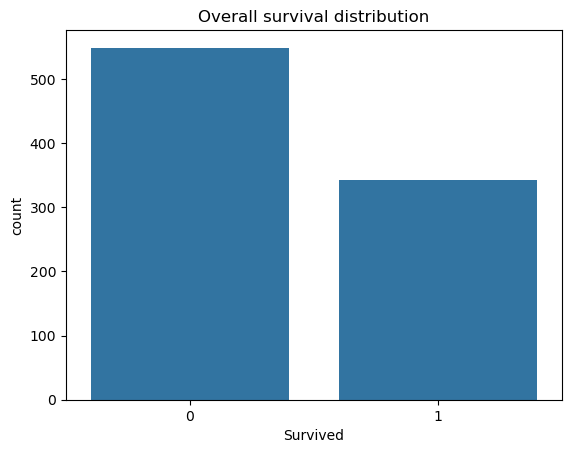

In [146]:
plt.title("Overall survival distribution")
sns.countplot(data = df, x = 'Survived')

Almost 63% people died :( => class imbalance

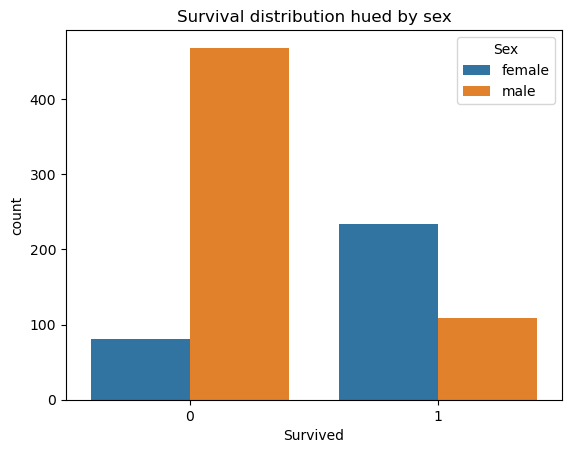

In [147]:
plt.title("Survival distribution hued by sex")
sns.countplot(data = df, x = 'Survived', hue = 'Sex')
plt.show()

Females have a high chance of surviving: approx 75%
Most men died: Survival change = 19% 

"Women and Children first" rule during evacuation.

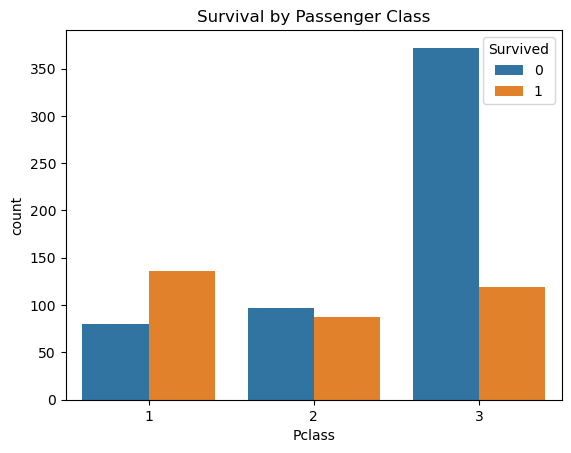

In [148]:
plt.title("Survival by Passenger Class")
sns.countplot(data = df, x ='Pclass', hue = 'Survived')
plt.show()

1st Class: ~63% survived

2nd Class: ~47% survived

3rd Class: ~24% survived

Socio-economic status has a big influence on survival

In [149]:
print(f"Total who survived in 1rst class: {len(df.query("Pclass == 1 and Survived == 1"))}")
print(f"Total who survived in 2nd class: {len(df.query("Pclass == 2 and Survived == 1"))}")
print(f"Total who survived in 3rd class: {len(df.query("Pclass == 3 and Survived == 1"))}")

Total who survived in 1rst class: 136
Total who survived in 2nd class: 87
Total who survived in 3rd class: 119


In [150]:
df['Pclass'].value_counts().sort_values(ascending=True)

Pclass
2    184
1    216
3    491
Name: count, dtype: int64

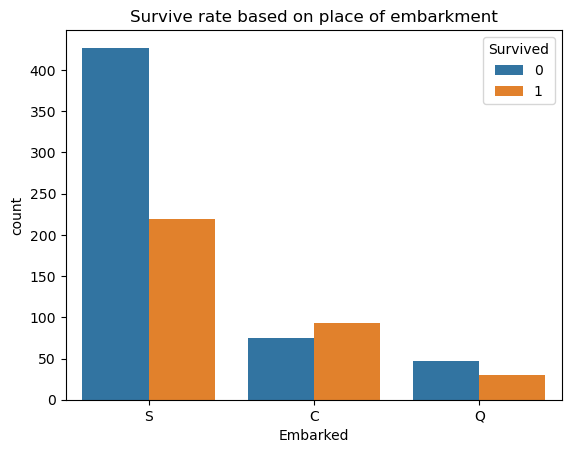

In [151]:
plt.title("Survive rate based on place of embarkment")
sns.countplot(data = df, x = 'Embarked', hue = 'Survived')
plt.show()

Cherbourg (C) => Passengers had higher surival rate (58%) -> many were 1rst class.

Southampton (S) => Passengers had lowest surviavl rate (33%) -> more 3rd-class passengers. 

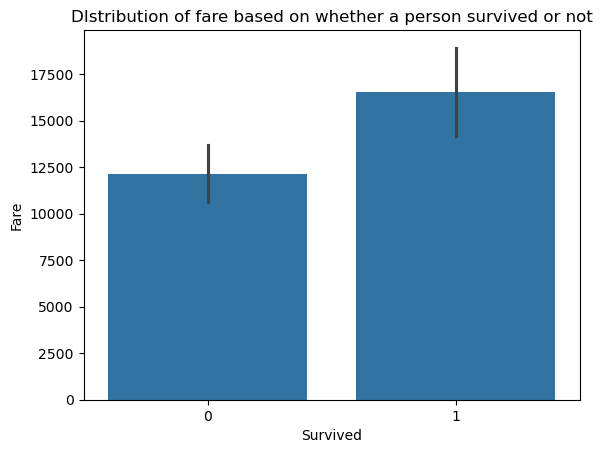

In [152]:
plt.title("DIstribution of fare based on whether a person survived or not")
sns.barplot(data = df, x = 'Survived', y = 'Fare', estimator=sum)
plt.show()

Playing with GroupBy

In [153]:
g = df.groupby('Pclass') 
for classs, class_df in g:
    print(classs)
    print(class_df)

1
     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
11            12         1       1   
23            24         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
23                        Sloper, Mr. William Thompson    male  28.0      0   
..                                                 ...     ...   ..

In [154]:
g.get_group(1).query('Survived == 1')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hasCabin
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,1
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,B78,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,1
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1


In [155]:
sub_df = df.groupby('Sex')['Age'] # focus on the age column in both the sub-dataframes.
sub_df.describe()

C:\Users\moham\AppData\Local\Temp\ipykernel_26800\1617528545.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_df = df.groupby('Sex')['Age'] # focus on the age column in both the sub-dataframes.


,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,27.929936,12.860189,0.75,21.0,28.0,35.0,63.0
male,577.0,30.140676,13.050847,0.42,23.0,28.0,35.0,80.0


Using nsmallest function to find the youngest people who did not survive. The same can be done for the oldest using nlargest.

In [156]:
df[df['Survived'] == 0].nsmallest(10, 'Age')[['Name', 'Age', 'Sex', 'Pclass']]


,Name,Age,Sex,Pclass
164,"Panula, Master. Eino Viljami",1.0,male,3
386,"Goodwin, Master. Sidney Leonard",1.0,male,3
7,"Palsson, Master. Gosta Leonard",2.0,male,3
16,"Rice, Master. Eugene",2.0,male,3
119,"Andersson, Miss. Ellis Anna Maria",2.0,female,3
205,"Strom, Miss. Telma Matilda",2.0,female,3
297,"Allison, Miss. Helen Loraine",2.0,female,1
642,"Skoog, Miss. Margit Elizabeth",2.0,female,3
824,"Panula, Master. Urho Abraham",2.0,male,3
374,"Palsson, Miss. Stina Viola",3.0,female,3


Analyzing co-relation

In [157]:
corr = df.corr(numeric_only=True)
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,hasCabin
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,0.019919
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.316912
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.725541
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.240314
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.040460
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.036987
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.482075
hasCabin,0.019919,0.316912,-0.725541,0.240314,-0.040460,0.036987,0.482075,1.000000


In [158]:
corr['Survived'].sort_values(ascending = False)

Survived       1.000000
hasCabin       0.316912
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64

<Axes: >

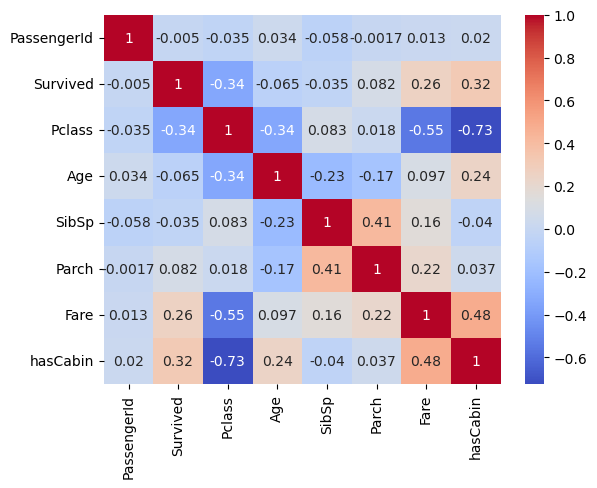

In [159]:
sns.heatmap(corr, annot = True, cmap = 'coolwarm')